<a href="https://colab.research.google.com/github/AleynaKapusuz/MnistGAN/blob/main/GanEx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GAN EXAMPLE



# İmport

In [2]:
from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# İmport Mnist Library

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # tuple şeklinde geleceği için parantezler içinde yazdım.
x_train = (x_train.astype(np.float32)-127.5)/127.5 # Normalize işlemi 255 in yarısı
# amaç = -1 ile 0 arasında yapmak
print(x_train.shape)

(60000, 28, 28)


In [4]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
print(x_train.shape)

(60000, 784)


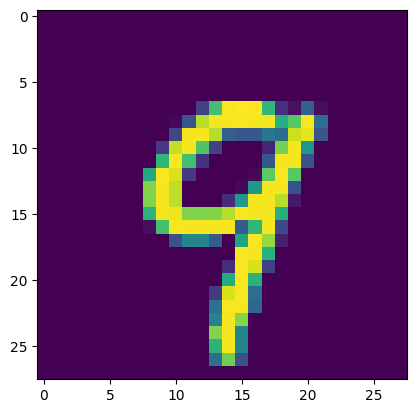

In [5]:
plt.imshow(x_test[12])

In [6]:
def create_generator():
    generator = Sequential()
    generator.add(Dense(units = 512, input_dim = 100)) # Burda yüzü oluşturmaya başlıyorum
    generator.add(ReLU())

    generator.add(Dense(units = 512))
    generator.add(ReLU())

    generator.add(Dense(units = 1024))
    generator.add(ReLU())

    generator.add(Dense(units = 784, activation = "tanh")) # Yukarda x_train.shape[1] = 784 olduğu için
                                            # burdaki çıkışımıda 764 yaptıp

    generator.compile(loss = "binary_crossentropy",optimizer = Adam(learning_rate=0.0001, beta_1 = 0.5))
    # beta_1 : lr nin değişme hızı ile alakalı bir parametre
    return generator

g = create_generator()
g.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          51,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 784)                 │         803,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,643,280 (6.27 MB)

 Trainable params: 1,643,280 (6.27 MB)

 Non-trainable params: 0 (0.00 B)

# Verify authenticity

In [7]:
def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(units = 1024, input_dim = 784)) # Units = ağdaki nöron sayısı : kafamıza göre
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))

    discriminator.add(Dense(units = 512))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))

    discriminator.add(Dense(units = 256))
    discriminator.add(ReLU())

    discriminator.add(Dense(units = 1, activation = "sigmoid")) # Real or fake o yüzden 1 ya real olacak ya fake

    discriminator.compile(loss = "binary_crossentropy",
                         optimizer = Adam(learning_rate=0.0001, beta_1 = 0.5))
    return discriminator

d = create_discriminator()
d.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1024)                │         803,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,460,225 (5.57 MB)

 Trainable params: 1,460,225 (5.57 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Discriminator ve generot ü birleştirme kısmı
def create_gan(discriminator, generator):
    discriminator.trainable = False
    gan_input = Input(shape = (100,))
    x = generator(gan_input)
    gan_output = discriminator(x) # generatorün outputunu disriminatore input olarak verdim
    gan = Model(inputs = gan_input, outputs = gan_output)

    gan.compile(loss = "binary_crossentropy", optimizer = "adam")
    return gan

gan = create_gan(d,g) # yukarda d ve g olarak çağırdım
gan.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 784)                 │       1,643,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 1)                   │       1,460,225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,103,505 (11.84 MB)

 Trainable params: 1,643,280 (6.27 MB)

 Non-trainable params: 1,460,225 (5.57 MB)

# Training

In [ ]:
# Train
epochs = 2
batch_size = 256

for e in range(epochs):
    for _ in range(batch_size):

        noise = np.random.normal(0,1, [batch_size,100]) # noise 100 yazdığım için yukarda
        # 256 ya 100 boyutunda
        generated_images = g.predict(noise) #fake ürettirdim
        image_batch = x_train[np.random.randint(low = 0, high = x_train.shape[0], size = batch_size)] # real resmi aldım
        # real leri de batch batch ayırdım
        x = np.concatenate([image_batch, generated_images]) # real ve fake i aynı anda vereceğim için birleştirtim
        # tek input olması gerektiği için birleştirdim
        # 256 + 256 = 712

        # bundan sonra label oluşturma kısmı
        # gerçeklerin labelları 1 olmak zorunda bu kısım da onu yapıyoruz
        y_dis = np.zeros(batch_size*2) # 712 lik y_dis elde ettim
        y_dis[:batch_size] = 1 # ilk 256 sı real olduğu için 1 yaptım
        d.trainable = True # ilk defa discriminate i eğitiyorum
        d.train_on_batch(x, y_dis)

        # Geri döndürme kısmı
        # yeni noise hesaplanıcak
        noise = np.random.normal(0,1,[batch_size,100])
        y_gen = np.ones(batch_size) # kandırmaya başlıyorum. bu yüzden label ları ones yaptım
        d.trainable = False # true olursa çok iyi bir generate olur hepsine fake der.
        gan.train_on_batch(noise, y_gen)

    print("epochs: ", e)

#g.save_weights("gans_model.keras") # benim ürettiğim resimler g de saklı olduğu için g yi kaydettim



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
8/8 ━━━━━━━━━

# Show

In [ ]:
noise = np.random.normal(loc=0, scale = 1, size = [100,100])
generated_images = g.predict(noise)
generated_images = generated_images.reshape(100,28,28) # orjinal boyutuna getirdim. Çünkü orjinal boyutunda görmek istiyorum
plt.imshow(generated_images[66], interpolation= "nearest") # 0 ile 60000 arasında resimlerden rastegele aldım.
plt.axis("off")
plt.show()